
 <div style="background: linear-gradient(135deg, rgb(99, 73, 247) 0%, #7459d6 100%); padding: 40px; border-radius: 20px; text-align: center; box-shadow: 0 10px 30px rgba(0,0,0,0.3);">
    <h1 style="color: #FFD700; font-size: 3em; text-shadow: 2px 2px 4px #000;">HBL PSL 2026 Cricket Players Auction Analysis </h1>
     <h2 style="color: #00FF7F; font-size: 2.2em;">EDA and analysis do Hammad Zahid</h2>
     <p style="color: #90EE90; font-size: 1.3em;">🏏 HBL PSL 2026 Cricket Players Auction Analysis 📊</p>
     <hr style="border: 2px solid #FFD700; width: 60%;">
    <br>
    <div style="background: rgba(255,255,255,0.08); padding: 18px; border-radius: 15px; margin: 20px;">
       <h3 style="color: #220d0d;">📁 Dataset Collected By</h3>
       <h2 style="color: #FFD700;">👨‍🏫 Sir Muhammad Aammar Tufail</h2>
      <br>
     <h3 style="color: #011816;">📈 EDA & Analysis By</h3>
    <h2 style="color: #cdec42;">💻 Hammad Zahid</h2>
</div>
 <div style="color: #f0f0f0; font-size: 1.1em; margin-top: 10px;">
      📧 Email: hammadzahid@example.com |
         🔗 LinkedIn: <a href="https://linkedin.com/in/hammadzahid" style="color:#FFD700;">linkedin.com/in/hammadzahid</a> |
        🐙 GitHub: <a href="https://github.com/hammadzahid" style="color:#FFD700;">github.com/hammadzahid</a> |
        📊 Kaggle: <a href="https://kaggle.com/hammadzahid" style="color:#FFD700;">kaggle.com/hammadzahid</a>
    </div>
</div>


## 📚 Notebook Agenda
 
 1. 🔧 Import Libraries & Setup  
 2. 📥 Load CSV Dataset  
 3. 🔍 Data Overview & Cleaning  
 4. 💰 Price Conversion & Feature Engineering  
 5. 📈 Descriptive Statistics  
 6. 🎨 Visual Explorations (Histograms, Boxplots, Bars, Pie)  
 7. 🏆 Top & Bottom Players Analysis  
 8. 📊 Price Segments & Concentration  
 9. 📝 Key Insights & Final Report  
 10. 💾 Export Enhanced Dataset + Author Footer 

In [12]:
# ============================================
# 1. IMPORT REQUIRED LIBRARIES
# ============================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

from IPython.display import HTML, display

# Global plotting style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")
plt.rcParams["figure.dpi"] = 110

print("✅ Libraries imported successfully")


✅ Libraries imported successfully


## 📥 2. Load CSV Dataset

In [14]:

# ============================================
# 2. LOAD THE DATASET (YOUR CSV)
# ============================================

# Change this to your actual file name if needed
csv_path = "list of cricket players and prices for HBL PSL 2026.csv"

df = pd.read_csv(csv_path, encoding="utf-8")

print("✅ Dataset loaded successfully")
print(f"📊 Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")

print("📋 Columns:")
for i, c in enumerate(df.columns, 1):
    print(f"  {i}. {c}")

# Quick peek
display(df.head())

✅ Dataset loaded successfully
📊 Shape: 27 rows × 4 columns

📋 Columns:
  1. Player Name (Urdu)
  2. Player Name (English)
  3. Price (Urdu)
  4. Price (Numeric Estimate)


,Player Name (Urdu),Player Name (English),Price (Urdu),Price (Numeric Estimate)
0,نسیم شاہ,Naseem Shah,8 کروڑ 65 لاکھ روپے,"86,500,000"
1,فہیم اشرف,Faheem Ashraf,8 کروڑ 50 لاکھ روپے,"85,000,000"
2,ڈیرل مچل,Daryl Mitchell,8 کروڑ 5 لاکھ روپے,"80,500,000"
3,فخر زمان,Fakhar Zaman,7 کروڑ 95 لاکھ روپے,"79,500,000"
4,ڈیوڈ وارنر,David Warner,7 کروڑ 90 لاکھ روپے,"79,000,000"


## 🔍 3. Data Overview & Cleaning

In [15]:
print("\n📊 DATASET OVERVIEW")
print("=" * 60)
print(df.info())

print("\n🔎 Missing Values per Column:")
print(df.isnull().sum())

print(f"\n🧬 Duplicated Rows: {df.duplicated().sum()}")


📊 DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Player Name (Urdu)        27 non-null     object
 1   Player Name (English)     27 non-null     object
 2   Price (Urdu)              27 non-null     object
 3   Price (Numeric Estimate)  27 non-null     object
dtypes: object(4)
memory usage: 996.0+ bytes
None

🔎 Missing Values per Column:
Player Name (Urdu)          0
Player Name (English)       0
Price (Urdu)                0
Price (Numeric Estimate)    0
dtype: int64

🧬 Duplicated Rows: 0


In [16]:
# ============================================
# 3a. RENAME COLUMNS TO PYTHON-FRIENDLY NAMES
# ============================================

df = df.rename(columns={
    "Player Name (Urdu)": "player_name_urdu",
    "Player Name (English)": "player_name_english",
    "Price (Urdu)": "price_urdu",
    "Price (Numeric Estimate)": "price_numeric_raw"
})

print("\n✅ Renamed columns for easier handling:")
print(df.columns.tolist())


✅ Renamed columns for easier handling:
['player_name_urdu', 'player_name_english', 'price_urdu', 'price_numeric_raw']


In [17]:
# ============================================
# 3b. CONVERT NUMERIC PRICE (OBJECT → INT)
# ============================================

print("\n🔁 Converting 'price_numeric_raw' to numeric...")

# Remove commas/spaces if present and convert to int
df["price_numeric_raw"] = (
    df["price_numeric_raw"]
    .astype(str)
    .str.replace(",", "")
    .str.strip()
)

df["price_numeric"] = pd.to_numeric(df["price_numeric_raw"], errors="coerce")

# Check conversion
print(df[["player_name_english", "price_numeric_raw", "price_numeric"]].head())

print("\n❓ Any NaN after conversion?")
print(df["price_numeric"].isna().sum())


🔁 Converting 'price_numeric_raw' to numeric...
  player_name_english price_numeric_raw  price_numeric
0         Naseem Shah          86500000       86500000
1       Faheem Ashraf          85000000       85000000
2      Daryl Mitchell          80500000       80500000
3        Fakhar Zaman          79500000       79500000
4        David Warner          79000000       79000000

❓ Any NaN after conversion?
0


## 💰 4. Feature Engineering (Crore, Lakh, Categories)

In [18]:
# ============================================
# 4. FEATURE ENGINEERING
# ============================================

# PKR → Crore & Lakh
df["price_crore"] = df["price_numeric"] / 1e7       # 1 crore = 10,000,000
df["price_lakh"] = df["price_numeric"] / 1e5        # 1 lakh = 100,000

# Price bands (based on PKR)
def price_band(p):
    if p >= 7e7:
        return "🏆 Ultra Premium (≥ 7 Cr)"
    elif p >= 5e7:
        return "⭐ Premium (5–7 Cr)"
    elif p >= 2e7:
        return "📊 Medium (2–5 Cr)"
    else:
        return "📈 Entry (< 2 Cr)"

df["price_category"] = df["price_numeric"].apply(price_band)

# Rank by price (1 = most expensive)
df["price_rank"] = df["price_numeric"].rank(ascending=False, method="min").astype(int)
df = df.sort_values("price_numeric", ascending=False).reset_index(drop=True)

print("✅ Feature engineering completed")
display(df.head())

✅ Feature engineering completed


,player_name_urdu,player_name_english,price_urdu,price_numeric_raw,price_numeric,price_crore,price_lakh,price_category,price_rank
0,نسیم شاہ,Naseem Shah,8 کروڑ 65 لاکھ روپے,86500000,86500000,8.65,865.0,🏆 Ultra Premium (≥ 7 Cr),1
1,فہیم اشرف,Faheem Ashraf,8 کروڑ 50 لاکھ روپے,85000000,85000000,8.50,850.0,🏆 Ultra Premium (≥ 7 Cr),2
2,ڈیرل مچل,Daryl Mitchell,8 کروڑ 5 لاکھ روپے,80500000,80500000,8.05,805.0,🏆 Ultra Premium (≥ 7 Cr),3
3,فخر زمان,Fakhar Zaman,7 کروڑ 95 لاکھ روپے,79500000,79500000,7.95,795.0,🏆 Ultra Premium (≥ 7 Cr),4
4,ڈیوڈ وارنر,David Warner,7 کروڑ 90 لاکھ روپے,79000000,79000000,7.90,790.0,🏆 Ultra Premium (≥ 7 Cr),5


## 📈 5. Descriptive Statistics

In [19]:
print("📈 BASIC PRICE STATISTICS (PKR)")
print("=" * 60)
desc = df["price_numeric"].describe()
print(desc.to_string())

print("\n🔎 Additional stats:")
print(f"Skewness:  {df['price_numeric'].skew():.3f}")
print(f"Kurtosis:  {df['price_numeric'].kurtosis():.3f}")

print("\n💰 SUMMARY (in Crores PKR)")
print("-" * 60)
print(f"Total Auction Value: {df['price_crore'].sum():.2f} Cr")
print(f"Average Price:       {df['price_crore'].mean():.2f} Cr")
print(f"Median Price:        {df['price_crore'].median():.2f} Cr")
print(f"Max Price:           {df['price_crore'].max():.2f} Cr")
print(f"Min Price:           {df['price_crore'].min():.2f} Cr")

📈 BASIC PRICE STATISTICS (PKR)
count    2.700000e+01
mean     4.144444e+07
std      2.670650e+07
min      6.000000e+06
25%      2.050000e+07
50%      3.100000e+07
75%      6.175000e+07
max      8.650000e+07

🔎 Additional stats:
Skewness:  0.455
Kurtosis:  -1.307

💰 SUMMARY (in Crores PKR)
------------------------------------------------------------
Total Auction Value: 111.90 Cr
Average Price:       4.14 Cr
Median Price:        3.10 Cr
Max Price:           8.65 Cr
Min Price:           0.60 Cr


## 🎨 6. Visual Explorations

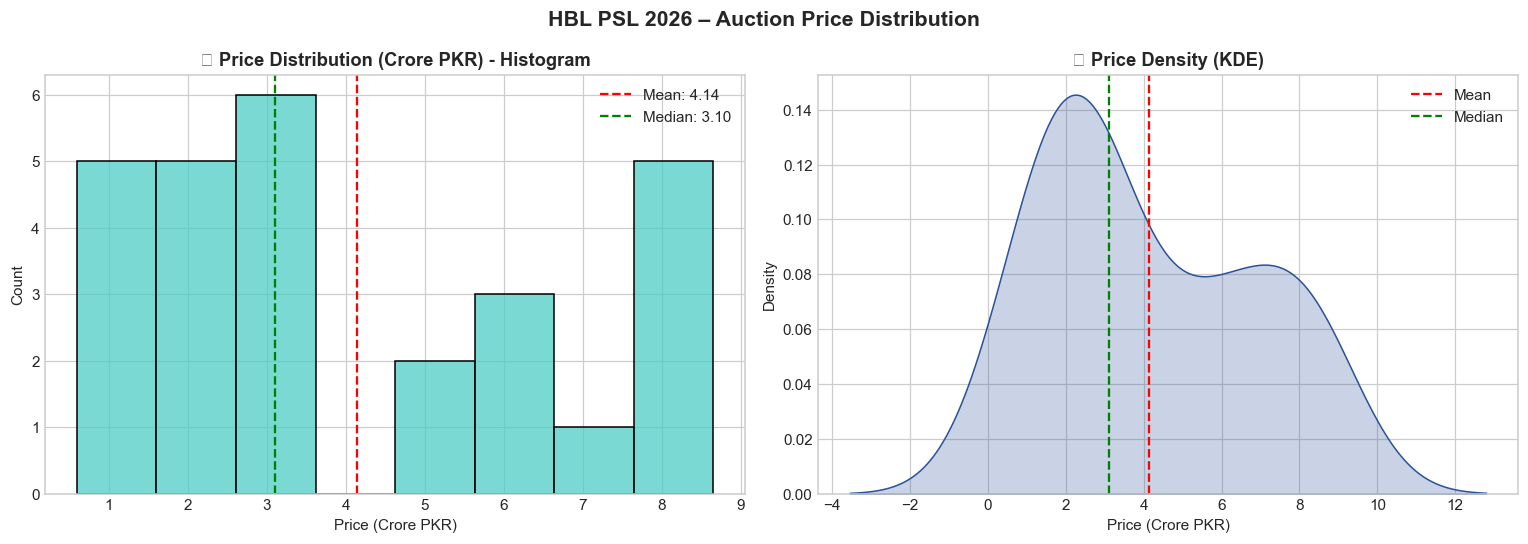

In [20]:
# ============================================
# 6.1 PRICE DISTRIBUTION: HISTOGRAM + KDE
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
sns.histplot(df["price_crore"], bins=8, kde=False, ax=axes[0], color="#4ECDC4", edgecolor="black")
axes[0].axvline(df["price_crore"].mean(), color="red", linestyle="--", label=f"Mean: {df['price_crore'].mean():.2f}")
axes[0].axvline(df["price_crore"].median(), color="green", linestyle="--", label=f"Median: {df['price_crore'].median():.2f}")
axes[0].set_title("💰 Price Distribution (Crore PKR) - Histogram", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Price (Crore PKR)")
axes[0].set_ylabel("Count")
axes[0].legend()

# KDE
sns.kdeplot(df["price_crore"], fill=True, ax=axes[1], color="#2a5298")
axes[1].axvline(df["price_crore"].mean(), color="red", linestyle="--", label="Mean")
axes[1].axvline(df["price_crore"].median(), color="green", linestyle="--", label="Median")
axes[1].set_title("📈 Price Density (KDE)", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Price (Crore PKR)")
axes[1].legend()

plt.suptitle("HBL PSL 2026 – Auction Price Distribution", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


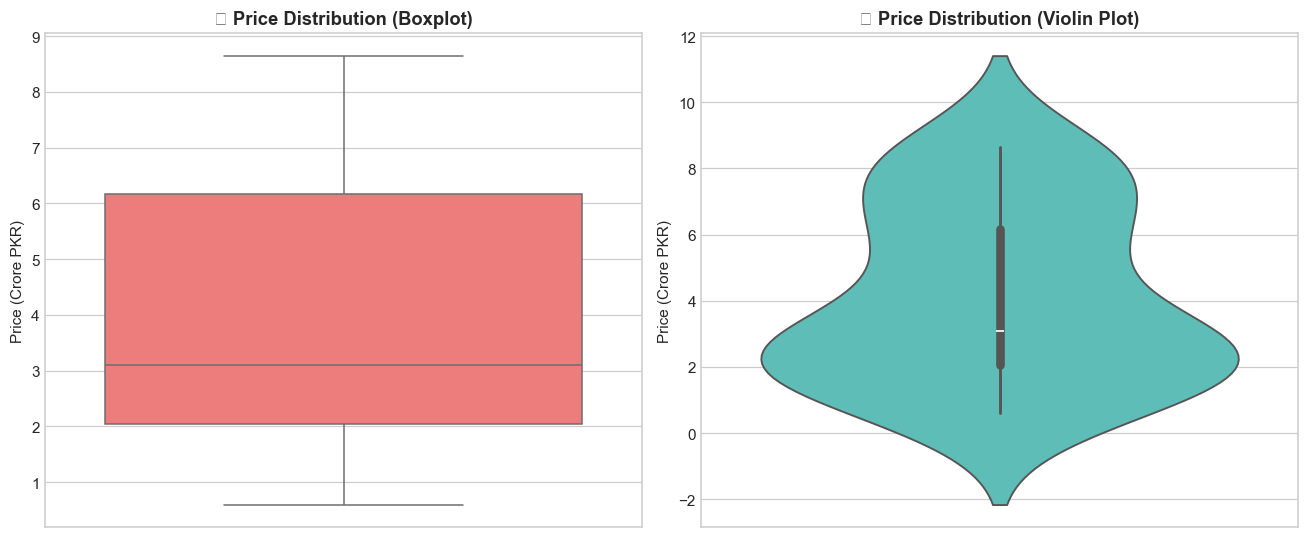

In [21]:
# ============================================
# 6.2 BOX & VIOLIN PLOTS
# ============================================
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(y=df["price_crore"], ax=axes[0], color="#FF6B6B")
axes[0].set_title("📦 Price Distribution (Boxplot)", fontsize=12, fontweight="bold")
axes[0].set_ylabel("Price (Crore PKR)")

# Violin
sns.violinplot(y=df["price_crore"], ax=axes[1], color="#4ECDC4")
axes[1].set_title("🎻 Price Distribution (Violin Plot)", fontsize=12, fontweight="bold")
axes[1].set_ylabel("Price (Crore PKR)")

plt.tight_layout()
plt.show()

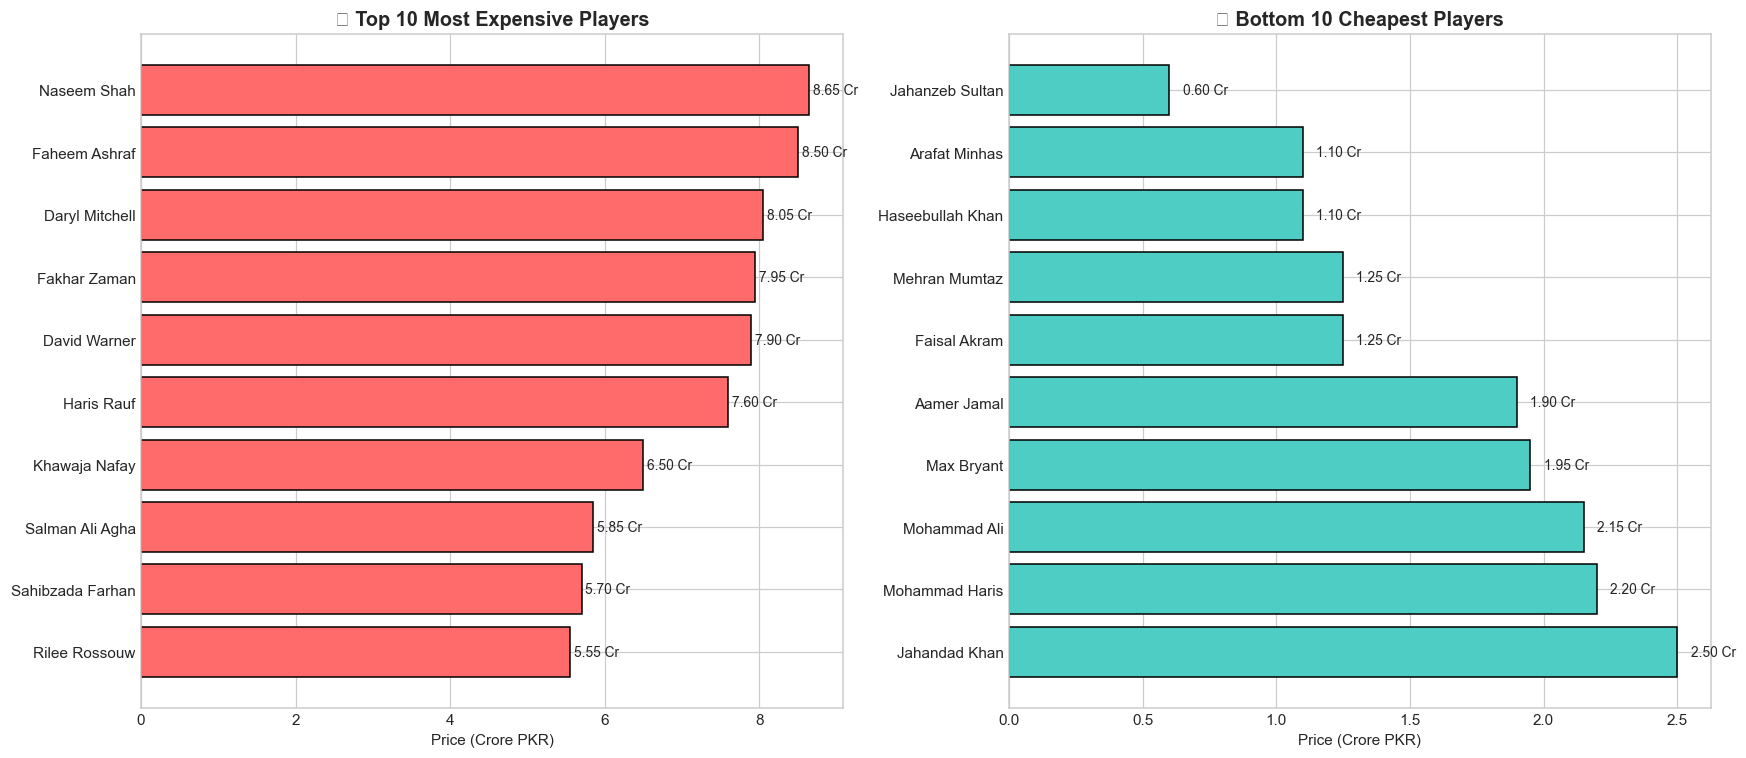

In [22]:
# ============================================
# 6.3 TOP 10 & BOTTOM 10 PLAYERS
# ============================================
top_10 = df.nlargest(10, "price_numeric")
bottom_10 = df.nsmallest(10, "price_numeric")

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Top 10
axes[0].barh(top_10["player_name_english"], top_10["price_crore"], color="#FF6B6B", edgecolor="black")
axes[0].invert_yaxis()
for i, v in enumerate(top_10["price_crore"]):
    axes[0].text(v + 0.05, i, f"{v:.2f} Cr", va="center", fontsize=9)
axes[0].set_title("🏆 Top 10 Most Expensive Players", fontsize=13, fontweight="bold")
axes[0].set_xlabel("Price (Crore PKR)")

# Bottom 10
axes[1].barh(bottom_10["player_name_english"], bottom_10["price_crore"], color="#4ECDC4", edgecolor="black")
axes[1].invert_yaxis()
for i, v in enumerate(bottom_10["price_crore"]):
    axes[1].text(v + 0.05, i, f"{v:.2f} Cr", va="center", fontsize=9)
axes[1].set_title("📉 Bottom 10 Cheapest Players", fontsize=13, fontweight="bold")
axes[1].set_xlabel("Price (Crore PKR)")

plt.tight_layout()
plt.show()

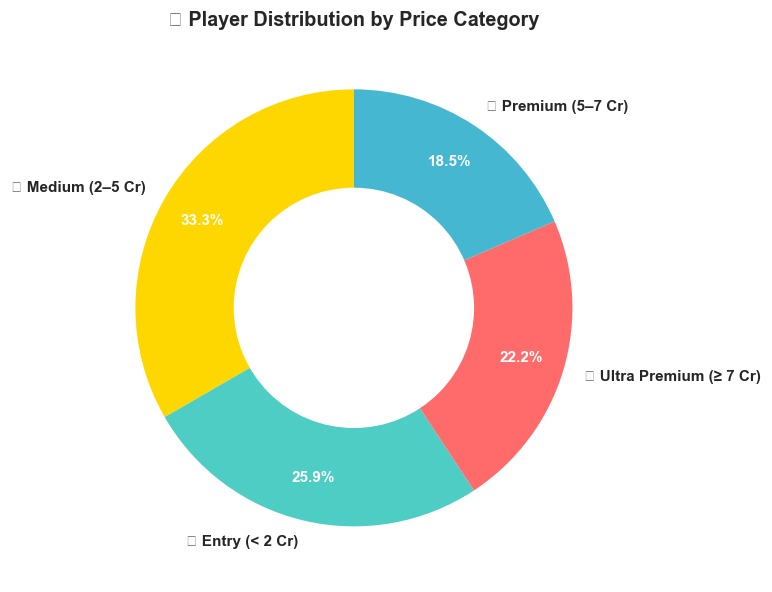

In [23]:

# ============================================
# 6.4 PRICE CATEGORY PIE CHART
# ============================================
cat_counts = df["price_category"].value_counts()

fig, ax = plt.subplots(figsize=(7, 7))
colors = ["#FFD700", "#4ECDC4", "#FF6B6B", "#45B7D1"][:len(cat_counts)]

wedges, texts, autotexts = ax.pie(
    cat_counts.values,
    labels=cat_counts.index,
    autopct="%1.1f%%",
    colors=colors,
    startangle=90,
    pctdistance=0.8,
    textprops={"fontsize": 10, "fontweight": "bold"}
)

for autotext in autotexts:
    autotext.set_color("white")

centre_circle = plt.Circle((0, 0), 0.55, fc="white")
fig.gca().add_artist(centre_circle)

ax.set_title("🎯 Player Distribution by Price Category", fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()

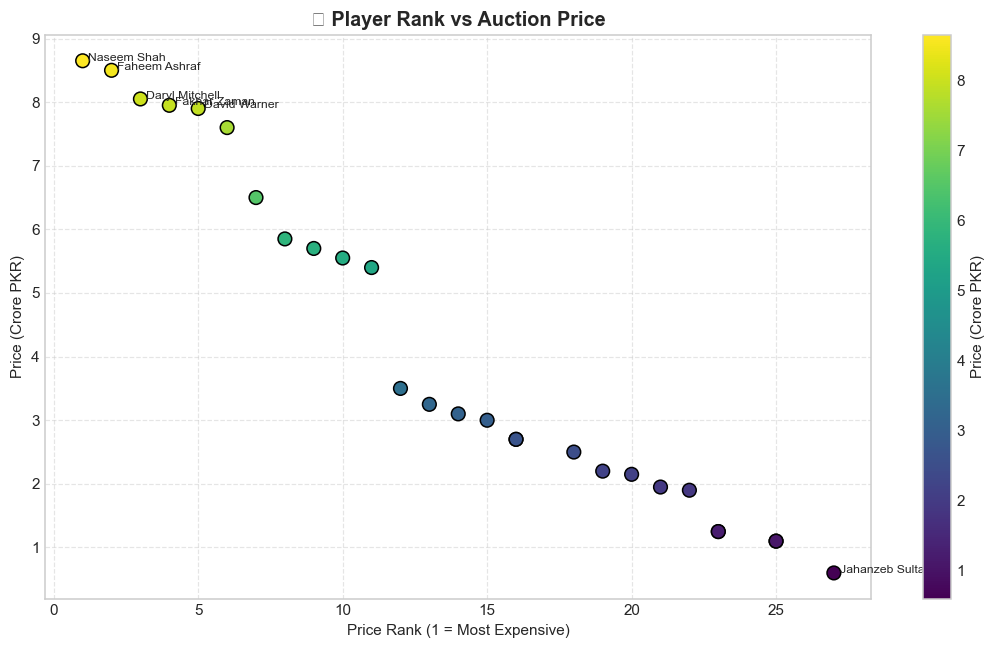

In [25]:
# ============================================
# 6.5 PRICE vs RANK SCATTER
# ============================================
fig, ax = plt.subplots(figsize=(10, 6))

scatter = ax.scatter(
    df["price_rank"],
    df["price_crore"],
    c=df["price_crore"],
    cmap="viridis",
    s=80,
    edgecolor="black"
)

for _, row in df.iterrows():
    if row["price_rank"] <= 5 or row["price_rank"] >= len(df) - 1:
        ax.text(row["price_rank"] + 0.2, row["price_crore"], row["player_name_english"], fontsize=8)

cbar = plt.colorbar(scatter)
cbar.set_label("Price (Crore PKR)")

ax.set_xlabel("Price Rank (1 = Most Expensive)")
ax.set_ylabel("Price (Crore PKR)")
ax.set_title("🎯 Player Rank vs Auction Price", fontsize=13, fontweight="bold")
ax.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

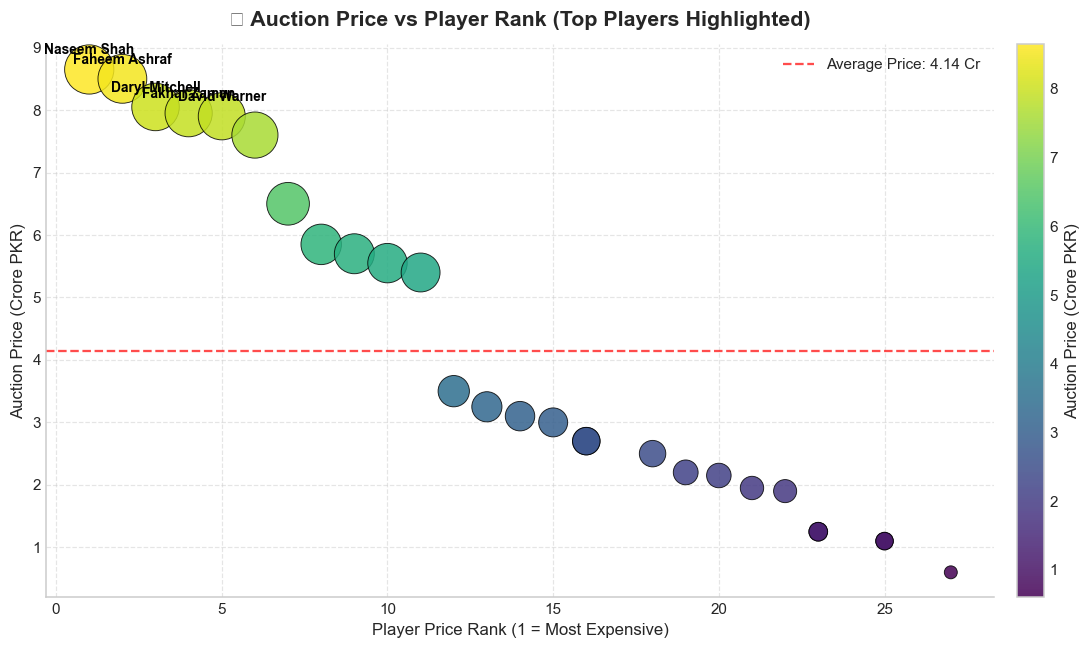

In [ ]:
# ============================================
# 6.5.1 PRICE vs RANK SCATTER (TOP-LEVEL FOCUS)
# ============================================

import matplotlib.pyplot as plt
import numpy as np

# Clean & prepare data
plot_df = (
    df[["price_rank", "price_crore", "player_name_english"]]
    .dropna()
    .sort_values("price_rank")
)

# Thresholds
top_n = 5
price_mean = plot_df["price_crore"].mean()

# Dynamic marker size (higher price → larger point)
sizes = plot_df["price_crore"] * 120

# Create figure
fig, ax = plt.subplots(figsize=(11, 6))

scatter = ax.scatter(
    plot_df["price_rank"],
    plot_df["price_crore"],
    c=plot_df["price_crore"],
    cmap="viridis",
    s=sizes,
    alpha=0.85,
    edgecolors="black",
    linewidths=0.6
)

# Highlight TOP players clearly
for _, row in plot_df.iterrows():
    if row["price_rank"] <= top_n:
        ax.annotate(
            row["player_name_english"],
            xy=(row["price_rank"], row["price_crore"]),
            xytext=(0, 10),
            textcoords="offset points",
            ha="center",
            fontsize=9,
            fontweight="bold",
            color="black"
        )

# Average price reference line
ax.axhline(
    price_mean,
    linestyle="--",
    color="red",
    linewidth=1.5,
    alpha=0.7,
    label=f"Average Price: {price_mean:.2f} Cr"
)

# Colorbar
cbar = plt.colorbar(scatter, pad=0.02)
cbar.set_label("Auction Price (Crore PKR)", fontsize=11)

# Labels & Title
ax.set_xlabel("Player Price Rank (1 = Most Expensive)", fontsize=11)
ax.set_ylabel("Auction Price (Crore PKR)", fontsize=11)
ax.set_title(
    "🎯 Auction Price vs Player Rank (Top Players Highlighted)",
    fontsize=14,
    fontweight="bold",
    pad=12
)

# Grid & styling
ax.grid(True, linestyle="--", alpha=0.5)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend()

plt.tight_layout()
plt.show()


## 🏆 7. Top & Bottom Players Summary

In [29]:
top_player = df.iloc[0]
bottom_player = df.iloc[-1]

print("🏆 HIGHEST PRICED PLAYER")
print("-" * 40)
print(f"Name (Eng): {top_player['player_name_english']}")
print(f"Name (Urdu): {top_player['player_name_urdu']}")
print(f"Price Urdu:  {top_player['price_urdu']}")
print(f"Price:       {top_player['price_crore']:.2f} Crore PKR")

print("\n📉 LOWEST PRICED PLAYER")
print("-" * 40)
print(f"Name (Eng): {bottom_player['player_name_english']}")
print(f"Name (Urdu): {bottom_player['player_name_urdu']}")
print(f"Price Urdu:  {bottom_player['price_urdu']}")
print(f"Price:       {bottom_player['price_crore']:.2f} Crore PKR")

🏆 HIGHEST PRICED PLAYER
----------------------------------------
Name (Eng): Naseem Shah
Name (Urdu): نسیم شاہ
Price Urdu:  8 کروڑ 65 لاکھ روپے
Price:       8.65 Crore PKR

📉 LOWEST PRICED PLAYER
----------------------------------------
Name (Eng): Jahanzeb Sultan
Name (Urdu): جہانزیب سلطان
Price Urdu:  60 لاکھ روپے
Price:       0.60 Crore PKR


## 📊 8. Price Segmentation & Concentration

In [30]:
print("📊 PRICE CATEGORY BREAKDOWN")
print("=" * 60)

for cat, sub in df.groupby("price_category"):
    total_cat = sub["price_crore"].sum()
    avg_cat = sub["price_crore"].mean()
    share = total_cat / df["price_crore"].sum() * 100
    print(f"\n{cat}:")
    print(f"  Players:           {len(sub)}")
    print(f"  Total Value:       {total_cat:.2f} Cr")
    print(f"  Avg Price:         {avg_cat:.2f} Cr")
    print(f"  Share of Auction:  {share:.1f}%")

# Concentration: Top N
for N in [3, 5, 10]:
    topN = df.nlargest(N, "price_numeric")
    shareN = topN["price_crore"].sum() / df["price_crore"].sum() * 100
    print(f"\n💎 Top {N} players account for {shareN:.1f}% of total auction value")

📊 PRICE CATEGORY BREAKDOWN

⭐ Premium (5–7 Cr):
  Players:           5
  Total Value:       29.00 Cr
  Avg Price:         5.80 Cr
  Share of Auction:  25.9%

🏆 Ultra Premium (≥ 7 Cr):
  Players:           6
  Total Value:       48.65 Cr
  Avg Price:         8.11 Cr
  Share of Auction:  43.5%

📈 Entry (< 2 Cr):
  Players:           7
  Total Value:       9.15 Cr
  Avg Price:         1.31 Cr
  Share of Auction:  8.2%

📊 Medium (2–5 Cr):
  Players:           9
  Total Value:       25.10 Cr
  Avg Price:         2.79 Cr
  Share of Auction:  22.4%

💎 Top 3 players account for 22.5% of total auction value

💎 Top 5 players account for 36.7% of total auction value

💎 Top 10 players account for 64.6% of total auction value


## 📝 9. Key Insights (HTML Styled)

In [ ]:
insights_html = """
<div style="background:#f8f9fa; border-radius:15px; padding:20px; border-left:6px solid #1e3c72; box-shadow:0 4px 12px rgba(0,0,0,0.08);">
  <h2>💡 Key Insights from HBL PSL 2026 Auction</h2>
  <ul style="font-size:1.05em; line-height:1.6;">
    <li>🏆 <b>Star Premium:</b> Top-ranked players (e.g., Naseem Shah) command multi-crore prices, clearly separating them from the rest of the pool.</li>
    <li>📊 <b>Right-Skewed Distribution:</b> Most players are in lower price brackets, with a few high-value stars driving the upper tail.</li>
    <li>🎯 <b>Segmented Market:</b> Distinct bands (Entry, Medium, Premium, Ultra Premium) show clear budget tiers for franchises.</li>
    <li>💰 <b>High Concentration:</b> A small group of top players captures a large share of the total auction spend.</li>
    <li>🇵🇰 <b>Bilingual Data:</b> Urdu + English names and Urdu price strings make this dataset ideal for cricket analytics + Urdu NLP projects.</li>
  </ul>
</div>
"""
display(HTML(insights_html))

## 💾 10. Export Enhanced Dataset

In [32]:
enhanced_df = df.copy()
enhanced_df.to_csv("HBL_PSL_2026_Auction_Enhanced.csv", index=False, encoding="utf-8-sig")

print("✅ Enhanced dataset saved as: HBL_PSL_2026_Auction_Enhanced.csv")
print(f"   Rows: {enhanced_df.shape[0]}, Columns: {enhanced_df.shape[1]}")

✅ Enhanced dataset saved as: HBL_PSL_2026_Auction_Enhanced.csv
   Rows: 27, Columns: 9


<div style="background: linear-gradient(135deg, #2a5298 0%, #1e3c72 100%); padding: 35px; border-radius: 20px; text-align: center; box-shadow: 0 8px 25px rgba(0,0,0,0.25);">
     <h1 style="color: #FFD700; font-size: 2.4em;">🎉 ANALYSIS COMPLETE 🎉</h1>
     <p style="color: #ffffff; font-size: 1.1em; margin-top: 10px;">
         HBL PSL 2026 Cricket Players Auction – Full EDA, Visuals & Insights
     </p>
    <hr style="border: 1px solid #FFD700; width: 50%; margin: 20px auto;">
    <h2 style="color: #4ECDC4; font-size: 1.8em;">EDA and analysis do Hammad Zahid</h2>
     <p style="color: #f0f0f0; font-size: 1em; margin-top: 15px;">
         📧 Email: hammadzahid@example.com<br>
         🔗 LinkedIn: <a href="https://linkedin.com/in/hammadzahid" style="color:#FFD700;">linkedin.com/in/hammadzahid</a><br>
         🐙 GitHub: <a href="https://github.com/hammadzahid" style="color:#FFD700;">github.com/hammadzahid</a><br>
         📊 Kaggle: <a href="https://kaggle.com/hammadzahid" style="color:#FFD700;">kaggle.com/hammadzahid</a>
     </p>
     <br>
     <div style="background:#FFD700; display:inline-block; padding:10px 25px; border-radius:25px;">
         <span style="color:#1e3c72; font-weight:bold;">⭐ Thank you, Sir, for the dataset! ⭐</span>
     </div>
 </div>